### **Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.**

### **Langkah 1 - Load Library**

In [1]:
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt

### **Langkah 2 - Unduh Dataset CIFAR**

In [2]:
# memuat dataset CIFAR-10, dataset terdiri dari dua bagian, yaitu data pelatihan (train_images dan train_labels) dan data pengujian (test_images dan test_labels).
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalisasi nilai piksel gambar dalam data pelatihan dan data pengujian agar berada dalam rentang 0 hingga 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### **Langkah 3 - Verifikasi Data**

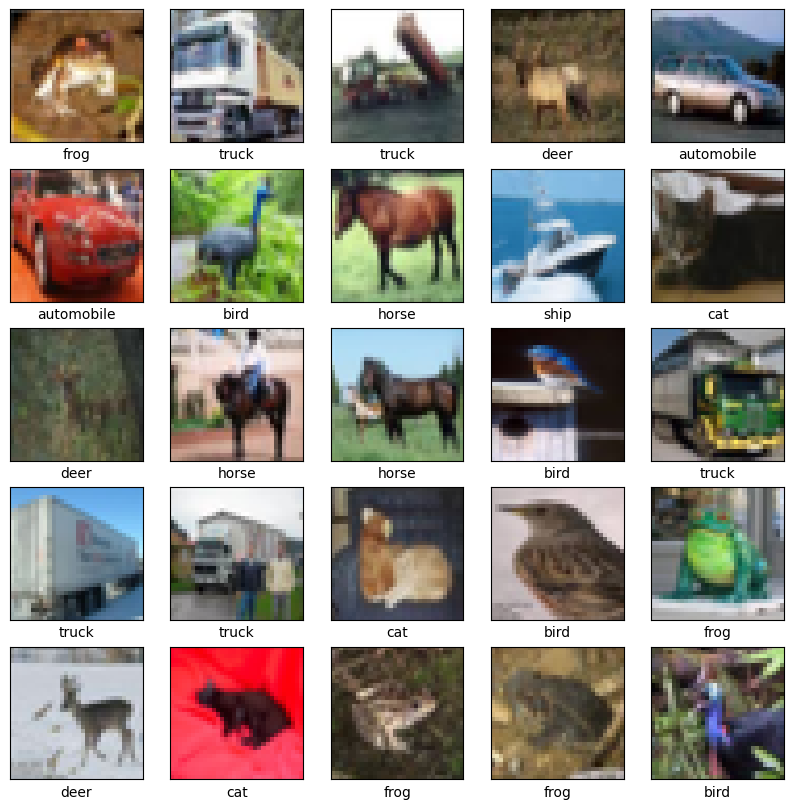

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### **Langkah 4 - Buat Model CNN**

In [4]:
# membuat model sequential
model = models.Sequential()

# lapisan konvolusi 1
model.add(layers.Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # ormalisasi Batch untuk stabilisasi dan percepatan pelatihan
# lapisan konvolusi 2
model.add(layers.Conv2D(64, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # lapisan MaxPooling untuk mengurangi dimensi gambar
model.add(layers.Dropout(0.2))  # dropout untuk mengurangi overfitting

# lapisan konvolusi 3
model.add(layers.Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
# lapisan konvolusi 4
model.add(layers.Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

# lapisan konvolusi 5
model.add(layers.Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
# lapisan konvolusi 6
model.add(layers.Conv2D(128, (4, 4), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.35))

# lapisan flatten untuk meratakan output dari lapisan konvolusi
model.add(layers.Flatten())

# dapisan dense 1
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# lapisan dense 2 (Output Layer) dengan fungsi aktivasi softmax untuk klasifikasi multi-kelas
model.add(layers.Dense(10, activation='softmax'))

# menampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                        

### **Langkah 5 - Compile Model CNN**

In [5]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

### **Langkah 6 - Fit Model**

In [6]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 47s 21ms/step - loss: 1.5592 - accuracy: 0.4679 - val_loss: 2.0730 - val_accuracy: 0.3319
Epoch 2/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9434 - accuracy: 0.6710 - val_loss: 1.0867 - val_accuracy: 0.6297
Epoch 3/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7600 - accuracy: 0.7393 - val_loss: 0.6844 - val_accuracy: 0.7632
Epoch 4/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6441 - accuracy: 0.7809 - val_loss: 0.6687 - val_accuracy: 0.7727
Epoch 5/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.5602 - accuracy: 0.8118 - val_loss: 0.5896 - val_accuracy: 0.8021
Epoch 6/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.4934 - accuracy: 0.8333 - val_loss: 0.6471 - val_accuracy: 0.7827
Epoch 7/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4353 - accuracy: 0.8524 - val_loss: 0.6298 -

### **Langkah 7 - Evaluasi Model**

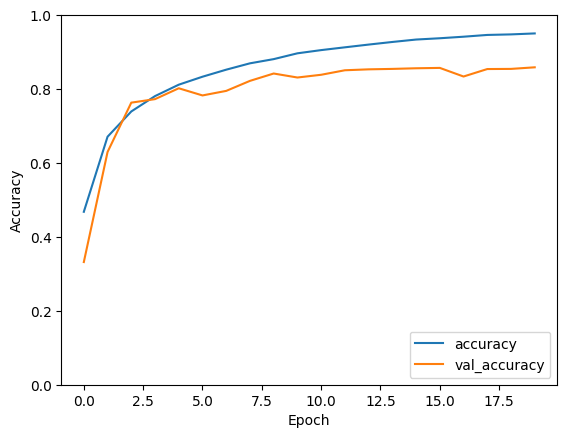

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### **Langkah 8 - Cetak Hasil Akurasi**

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 2s - loss: 0.5255 - accuracy: 0.8588 - 2s/epoch - 7ms/step
Test accuracy: 0.8587999939918518




---


### **Buatlah model CNN untuk klasifikasi dataset MNIST.**

### **Langkah 1 - Unduh Dataset MNIST**

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

## **Tanpa PCA**

### **Langkah 2 - Buat Model CNN**

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

### **Langkah 3 - Compile Model CNN**

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **Langkah 4 - Fit Model**

In [12]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1613 - accuracy: 0.9497 - val_loss: 0.0480 - val_accuracy: 0.9858
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.0279 - val_accuracy: 0.9912
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0295 - val_accuracy: 0.9912
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.0250 - val_accuracy: 0.9917
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0365 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 0.0258 - val_accuracy: 0.9919
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.0370 - val_accura

### **Langkah 5 - Evaluasi Model**

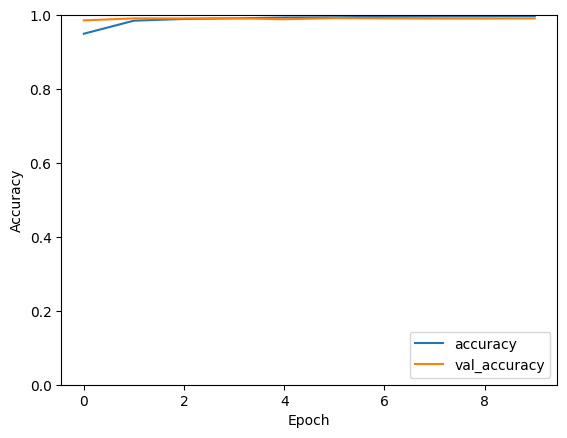

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### **Langkah 6 - Cetak Hasil Akurasi**

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.0307 - accuracy: 0.9911 - 662ms/epoch - 2ms/step
Test accuracy: 0.991100013256073


## **Menggunakan PCA**

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# PCA
all_images = np.concatenate((train_images, test_images), axis=0)
flat_images = all_images.reshape((len(all_images), -1))

scaler = StandardScaler()
scaled_images = scaler.fit_transform(flat_images)

num_components = 50
pca = PCA(n_components=num_components)
pca_result = pca.fit_transform(scaled_images)

train_pca, test_pca = pca_result[:len(train_images)], pca_result[len(train_images):]

# Model with PCA
model_pca = models.Sequential()
model_pca.add(layers.Dense(64, activation='relu', input_shape=(num_components,)))
model_pca.add(layers.Dense(10, activation='softmax'))

model_pca.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training with PCA
history_pca = model_pca.fit(train_pca, train_labels, epochs=10, validation_data=(test_pca, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4109 - accuracy: 0.8804 - val_loss: 0.2187 - val_accuracy: 0.9362
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1892 - accuracy: 0.9431 - val_loss: 0.1762 - val_accuracy: 0.9492
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1492 - accuracy: 0.9556 - val_loss: 0.1404 - val_accuracy: 0.9601
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1262 - accuracy: 0.9623 - val_loss: 0.1321 - val_accuracy: 0.9617
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1109 - accuracy: 0.9669 - val_loss: 0.1217 - val_accuracy: 0.9660
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1011 - accuracy: 0.9690 - val_loss: 0.1260 - val_accuracy: 0.9663
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0919 - accuracy: 0.9715 - val_loss: 0.1246 - val_accuracy:

### **Evaluasi Model With PCA**

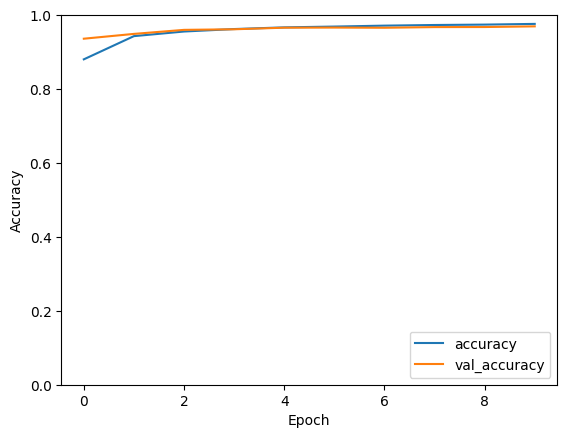

In [17]:
plt.plot(history_pca.history['accuracy'], label='accuracy')
plt.plot(history_pca.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### **Cetak Hasil Akurasi With PCA**

In [18]:
test_loss, test_acc = model_pca.evaluate(test_pca, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.1186 - accuracy: 0.9696 - 569ms/epoch - 2ms/step
Test accuracy: 0.9696000218391418
